In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
myDigits = load_digits()

In [4]:
dir(myDigits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
myDigits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

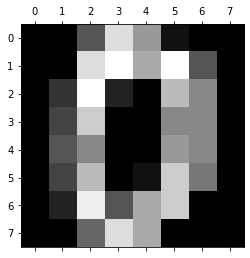

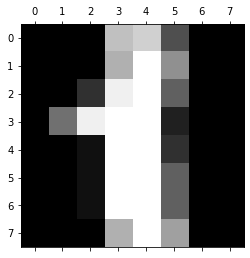

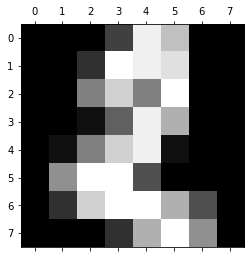

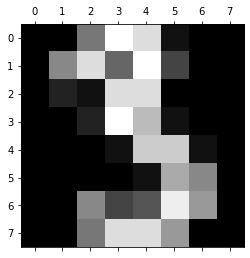

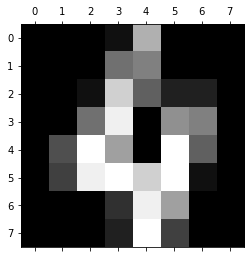

In [28]:
plt.gray()
for i in range(5):
    plt.matshow(myDigits.images[i])

In [45]:
myDigits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
myDigits.target[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
a_train, a_test, b_train, b_test = train_test_split(myDigits.data, myDigits.target, test_size=0.1)

In [51]:
print(len(a_train))
print(len(a_test))

1617
180


In [53]:
from sklearn.linear_model import LogisticRegression
myModel = LogisticRegression()

In [54]:
myModel.fit(a_train, b_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
myModel.score(a_test,b_test)

0.95

Lets predict for the the data at index 19:

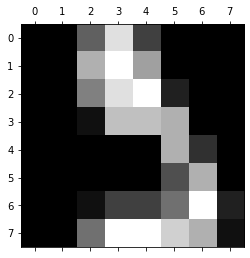

In [57]:
plt.matshow(myDigits.images[19])

The above image is not clear so its very difficult to recognize. Lets see what number it is by using the property, "target" for index 19 

In [63]:
myDigits.target[19]

9

In [64]:
myDigits.data[19]

array([ 0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,
        0.,  0.,  0.,  0.,  0.,  8., 14., 16.,  2.,  0.,  0.,  0.,  0.,
        1., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  4.,
        4.,  7., 16.,  2.,  0.,  0.,  7., 16., 16., 13., 11.,  1.])

In [65]:
myModel.predict([myDigits.data[19]])

array([9])

The above predicted number is right

In [67]:
myModel.predict(myDigits.data[0:5])

array([0, 1, 2, 3, 4])

In [68]:
myDigits.target[0:5]

array([0, 1, 2, 3, 4])

So our model is predicting correctly for data from index 0 to 5

Now lets see how our model is performing overall. we will attain this by using confusion matrix:

In [70]:
from sklearn.metrics import confusion_matrix
y_pred = myModel.predict(a_test)
cm = confusion_matrix(b_test,y_pred)
cm

array([[15,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 23]], dtype=int64)

Text(69.0, 0.5, 'Actual')

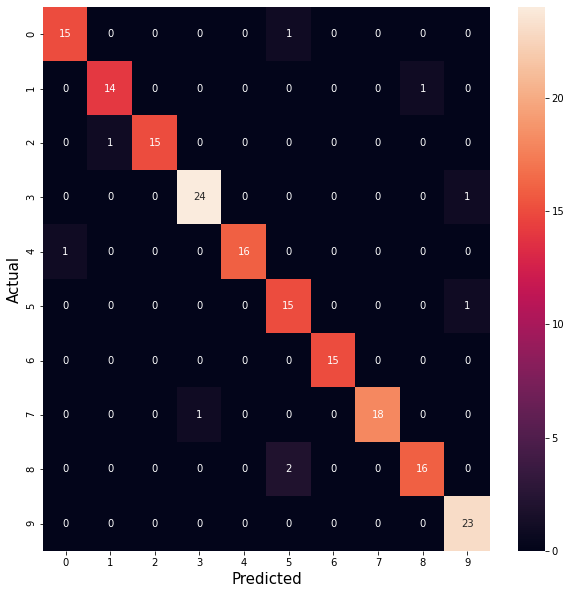

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)